### Importing Libraries



In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

### Importing the datasets



In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


The `train` set has a little over 10K records whereas the `test` set has around 6.5K records. 

The `test` dataset contains all columns as the `train` set except for the response variables - `casual`, `registered` and `count`

### Data Fields

- **datetime** - hourly date + timestamp<br/>
- **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br/>
- **holiday** - whether the day is considered a holiday<br/>
- **workingday** - whether the day is neither a weekend nor holiday
- **weather** - <br/>
      1: Clear, Few clouds, Partly cloudy, Partly cloudy <br/>
      2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br/>
      3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br/>
	  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br/>
- **temp** - temperature in Celsius<br/>
- **atemp** - "feels like" temperature in Celsius<br/>
- **humidity** - relative humidity<br/>
- **windspeed** - wind speed<br/>
- **casual** - number of non-registered user rentals initiated<br/>
- **registered** - number of registered user rentals initiated<br/>
- **count** - number of total rentals<br/>

### Check for Missing Values

In [6]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

Here, we can see that neither the `train` set nor the `test` set has any missing values. 

### Let's get more information from the datetime column 

In [9]:
train["date"] = train.datetime.apply(lambda x : str(x).split()[0])
train["hour"] = train.datetime.apply(lambda x : (str(x).split()[1]).split(":")[0]).astype("int")
train["year"] = train.datetime.apply(lambda x : str(x).split()[0].split("-")[0])
train["weekday"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,2011,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,2011,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,2011,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,2011,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,2011,5,1


We can see that there has been an addition of `date`, `hour`, `year`, `weekday` and `month` from the `datetime` column. Now let's see what effect these columns have on the `count`. In other words, let's see how the count changes as data in these columns changes. 

[Text(0,0.5,'Users Count'),
 Text(0.5,0,'Hour Of The Day'),
 Text(0.5,1,'Average Users Count By Hour Of The Day Across User Type'),
 None]

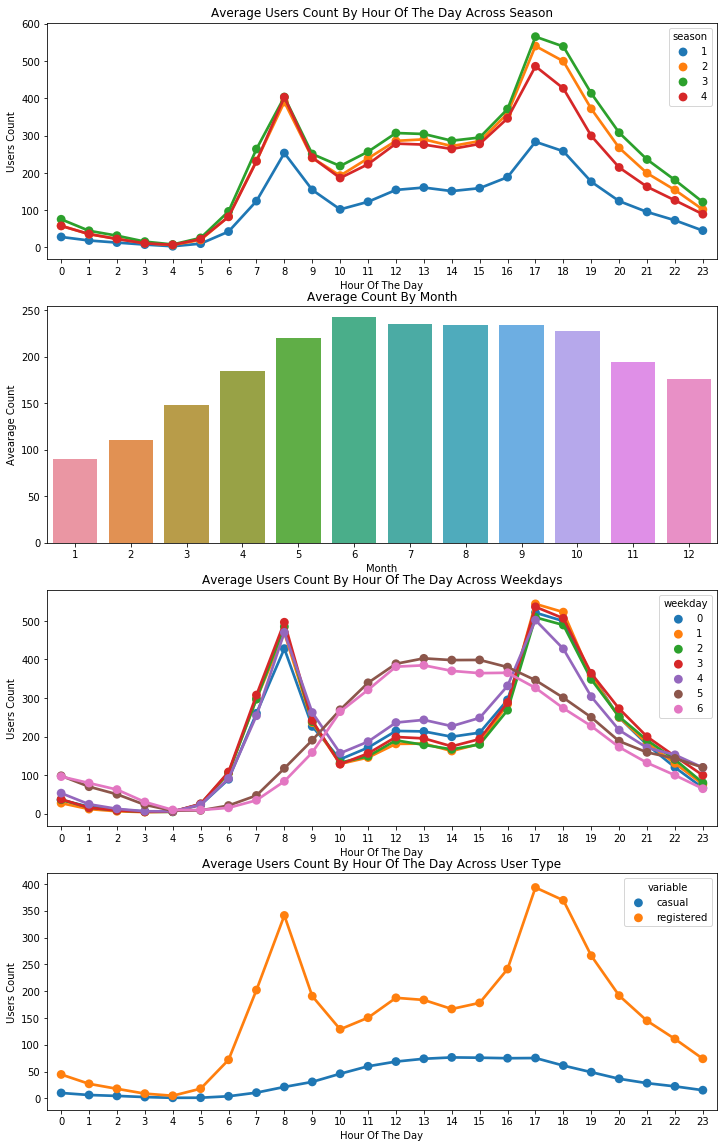

In [25]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4)
fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

hourAggregated = pd.DataFrame(train.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True, ax=ax1)
ax1.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

monthAggregated = pd.DataFrame(train.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sns.barplot(data=monthSorted,x="month",y="count",ax=ax2)
ax2.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourAggregated = pd.DataFrame(train.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"], data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hourTransformed = pd.melt(train[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')


### Correlation Analysis

The `corr()` method finds the . In the heaatmap method of seaborn, we pass the correlation matrix along with 4 other parameters : 

- `mask` - to mask the upper half of the correlation plot. (Avoid displaying the same values on the upper half and causing confusion)
- `vmax` - the maximum value of the legend (default 1)
- `square` - so that the title will be a square and not a rectangle
- `annot` - to display the corresponding correlation number on each tile 

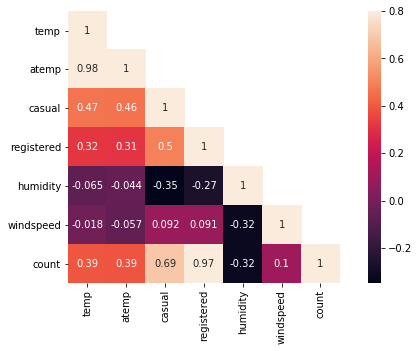

In [26]:
corrMatt = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)